In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import fsolve

In [11]:
class RFIM_irrational(object):
    '''A class for simulating the Random Field Ising Model '''
    
    def __init__(self, beta, J, F, N, delta, alpha):
        '''Create an instance of the RFIM with parameters J,F
        of size N, with fields h with a random normal distribution of parameter delta'''
        self.beta = beta
        self.J = J
        self.F = F
        self.N = N
        self.S = np.random.choice([-1,1], size = [N,N])
        self.matJ = np.random.choice([-J,0,J], size = [N,N])
        self.alpha = alpha
        if delta == 0: # For the zero temperature case
            self.h = np.zeros(N)
        else:
            #self.h = np.random.laplace(scale = delta, size = N)
            #self.h = np.random.normal(loc = 0, scale = delta, size = N)
            self.h = F
        
    def m(self):
        '''Computes average opinion '''
        return np.mean(self.S)
    
    def eng(self, a, b):
        acc1, acc2 = 0 , 0
        S0 = self.S[a,b]
        nb = self.S[(a+1)%N, b]*self.matJ[(a+1)%N, b] + self.S[a,(b+1)%N]*self.matJ[(a+1)%N, b] + self.S[(a-1)%N, b]*self.matJ[(a-1)%N, b] + self.S[a,(b-1)%N]*self.matJ[a,(b-1)%N]
        acc1 += -nb*S0
        acc2+= self.h*S0
        return acc1/2 + acc2  #divide by 2 to compensate for over-counting

        
        
                                   
    def p(self, i):
        '''Computes the local opinion polarization for agent i p_i
        inputs: agent label i
        returns: the field p_i'''
        local_m = (self.S.sum() - self.S[i]) / (self.N)
        return self.h[i] + self.F + self.J * local_m
    
    def matE(self):
        return([[self.eng(i,j) for j in range(N)] for i in range(N)])
    
    def g(self, i, t, h):
        return
    
    def flip(self,a, b):
        '''Changes S_i -> -S_i according to the dynamic rule
        input: agent label i
        returns: 0 if the agent didn't change opinion
                 1 if the agent changed opinion
        
        local_sum1, local_sum2, local_sum3 = 0, 0, 0
        for i in range(N-1):
                local_sum1 += self.matJ[i, i+1] * self.S[i] * self.S[i+1]
                
        for i in range(N):
            local_sum2 += self.S[i]*self.h[i0]
            if self.S[i] == -1:
                local_sum3 += -1# * self.g(i, t, h)
        '''     
        u_i0 = self.eng(a, b)
        prob_flip = 1/(1 + np.exp(beta*u_i0))
        
        if np.random.random() < prob_flip:
            self.S[a, b] *= -1
            return 1
        else:
            return 0
    
    def sweep(self):
        '''Goes through all N agents and tries to flip them
        input: none
        returns: number of agents that changed their mind
        '''
        s = 0
        elements1 = list(range(N))
        elements2 = list(range(N))
        np.random.shuffle(elements1)
        np.random.shuffle(elements2)
        for a in elements1:
            for b in elements2:
                s += self.flip(a, b)
        return s
    
    def equilibrate(self): # Needs modification for finite temperature case
        '''Find the equilibrium of the system'''
        flips = self.sweep()
        count = 0
        while count < 100:
            flips = self.sweep()
            count += 1

In [12]:
J = 1
delta = 1
N = 10
F = 100000000
M = 1 # number of repetitions
beta = 1/(1.380649 * 10**(-23))
beta2 = beta/2.5
beta3 = beta/5.0
beta4 = beta/7.5
sim2 = RFIM_irrational(beta,J,F,N,delta,0.1)
sim2.S
#m = np.empty((len(betas),M))


array([[ 1,  1,  1, -1,  1, -1, -1,  1,  1,  1],
       [-1,  1,  1,  1, -1, -1,  1, -1, -1,  1],
       [-1,  1,  1, -1,  1,  1,  1, -1, -1,  1],
       [-1, -1,  1,  1,  1,  1,  1, -1, -1, -1],
       [ 1,  1, -1, -1, -1, -1,  1,  1,  1,  1],
       [-1, -1,  1, -1, -1, -1, -1,  1, -1, -1],
       [ 1, -1,  1,  1, -1, -1,  1,  1,  1,  1],
       [ 1, -1,  1,  1, -1, -1, -1,  1, -1, -1],
       [-1, -1, -1,  1, -1, -1,  1,  1, -1, -1],
       [ 1,  1,  1, -1, -1,  1,  1,  1,  1, -1]])

In [15]:
def fev(l):
    acc = 0
    for i in l:
        for elem in i:
            if elem < 1 :
               acc+=1
    return(acc/(len(l)**2))

/tmp/ipykernel_26117/2208620024.py:65: RuntimeWarning: overflow encountered in exp
  prob_flip = 1/(1 + np.exp(beta*u_i0))


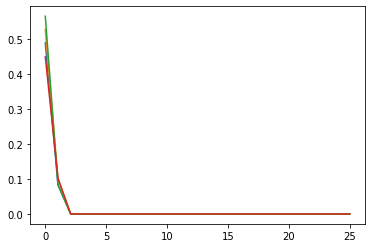

In [16]:
x = np.linspace(0, 25, num = 25)
y1, y2, y3, y4 = [], [], [], []
for x0 in x:
    acc1, acc2, acc3, acc4 = [], [], [], []
    for indice in range(5):
        sim1 = RFIM_irrational(beta,J,x0,N,delta,0.1)
        sim1.equilibrate()
        acc1.append(fev(sim1.S))
        
        sim2 = RFIM_irrational(beta2,J,x0,N,delta,0.1)
        sim2.equilibrate()
        acc2.append(fev(sim2.S))
        
        sim3 = RFIM_irrational(beta3,J,x0,N,delta,0.1)
        sim3.equilibrate()
        acc3.append(fev(sim3.S))
        
        sim4 = RFIM_irrational(beta4,J,x0,N,delta,0.1)
        sim4.equilibrate()
        acc4.append(fev(sim4.S))
        
    y1.append(np.mean(acc1))
    y2.append(np.mean(acc2))
    y3.append(np.mean(acc3))
    y4.append(np.mean(acc4))
    


In [ ]:
plt.scatter(x, y1, label = "T = 1.0")
plt.scatter(x, y2, label = "T = 2.5" )
plt.scatter(x, y3, label = "T = 5.0")
plt.scatter(x, y4, label = "T = 7.5")
plt.legend()
plt.show()

In [ ]:
RFIM_irrational(beta,J,10000000000000000000000000000000000000000000000000000000000000000000000,N,delta,0.1).matE()

In [138]:
for j in range(M):
    beta = 0
    sim2.equilibrate()
    for i in range(len(betas)):
        beta = betas[i]
        sim2.beta = beta
        sim2.equilibrate()
        m[i,j] = sim2.m()
    print(j)
m2 = np.average(m**2,axis=1)

NameError: name 'i0' is not defined

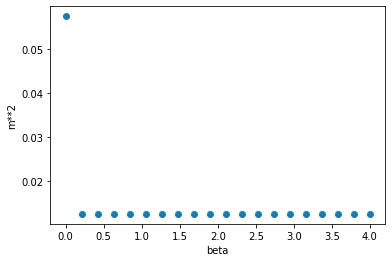

In [8]:
plt.scatter(betas,m2)
plt.xlabel('beta')
plt.ylabel("m**2")
plt.show()